# Pymaceuticals Inc.
---

## Analysis

### Comprehensive Analysis of the Study

The objective of this investigation is to investigate how different treatment regimens affect the amount of tumors in mice. We concentrate on Capomulin, Ramicane, Infubinol, and Ceftamin in particular. Tumor volume, gender distribution, the correlation between mouse weight and tumor volume, and the overall efficacy of the treatments were all examined using a variety of statistical techniques and visualizations. An extensive interpretation of the results is provided below.

### 1. Drug Regimen Bar Plot: Total Mouse Observations

The most observations are made by Capomulin and Ramicane. This implies that more information about these regimens is available, increasing confidence in their effectiveness.
Compared to other therapies, Propriva has the fewest observations, which might make its results less dependable.
The study design is solid and no treatment is underrepresented due to the uniform distribution of observations across most medication regimens. The trustworthiness of the statistical analysis and study conclusions is increased when there are a lot of data points.

### 2. Gender Distribution Analysis

The distribution of the male and female mice in the study was plotted as pie charts using Matplotlib and Pandas. It was discovered that the gender distribution was almost equal, with:
49.6% of mice were female.
50.4% of mice were male.
The nearly equal distribution of male and female mice guarantees that gender disparities won't affect the medication's effects. Because both the biological differences between males and females are taken into consideration, the even split increases the study's robustness and produces more broadly applicable findings.

### 3. Final Tumor Volume for Capomulin, Ramicane, Infubinol, and Ceftamin
The ultimate tumor volume is a crucial metric for evaluating how well the medication treatments work. Ceftamin, Ramicane, Infubinol, and Capomulin were the main subjects of the study.
At the endpoint, capomulin and Ramicane showed noticeably reduced tumor volumes, demonstrating its efficacy in reducing tumor growth.
The larger tumor sizes observed with Infubinol and Ceftamin suggest that these medications are less successful in shrinking tumors.
### 4. Outlier Detection
For each of the four regimens, the Interquartile Range (IQR) was employed to look for tumor volume outliers. This guarantees a careful analysis of the data to look for any irregularities that could distort the outcomes.
Capomulin and Ramicane: All animals given these medications showed a constant decrease in tumor size, with no noteworthy outliers.
Infubinol: A single anomaly exhibiting a tumor volume of 36.32 mm³, indicating that certain mice might react more favorably to the intervention than others.
Ceftamin: Compared to Capomulin and Ramicane, there are generally larger tumor sizes but no outliers.
Capomulin and Ramicane's absence of outliers supports their dependability as successful tumor-reduction therapies. On the other hand, Infubinol's outlier suggests that the medication's effects are less constant among users.

### 5. Box Plot: Tumor Volume Distribution by Drug Regimen

The box plot makes it simple to compare different medication regimens by visualizing the distribution of tumor volumes for ceftamin, capomulin, ramicane, and infubinol.
Capomulin and Ramicane: These two regimens exhibit reduced median tumor sizes and narrower distributions, which point to a steady and efficient reduction in tumor size.
Ceftamin and Infubinol both had bigger data dispersion and greater median tumor sizes, which may indicate less consistent results.
When it comes to reducing tumor size, the visual representation demonstrates that Capomulin and Ramicane outperform Infubinol and Ceftamin. Capomulin and Ramicane's possible therapeutic utility is further supported by the consistency of the data.

### 6. Scatter Plot: Relationship Between Mouse Weight and Tumor Volume

To investigate the link between average tumor volume and mouse weight, a scatter plot was created.
The average tumor volume and mouse weight have a marginally positive connection. This indicates that there is a weak correlation—that is, a minor propensity for tumor growth to increase along with mouse weight.
The association between heavier mice and somewhat larger tumors is not very robust, although there is a modest trend suggesting this. Thus, it's possible that additional biological variables are at work and that mouse weight alone is not a reliable indicator of tumor volume.

### 7. Capomulin Treatment Line Plot (Mouse l509)

A line plot illustrating the tumor volume change over time in mouse l509 treated with capomulin.
Plotting shows a consistent decrease in tumor volume over time, suggesting that capomulin was successful in reducing the tumor size in this specific mouse.
This particular case demonstrates how well capomulin works over time to gradually reduce tumor size. It demonstrates that the medication may cause the tumor volume to gradually and steadily decrease.

### 8. Linear Regression: Mouse Weight vs. Average Tumor Volume (Capomulin)

To learn more about the correlation between mouse weight and average tumor volume in mice receiving capomulin treatment, a linear regression analysis was carried out.
The average tumor volume and mouse weight have a strong positive link, as indicated by the correlation coefficient of 0.84.
According to the linear regression line, heavier mice often have larger tumor sizes; however, the trend is more noticeable in mice that get capomulin treatment.
In the Capomulin group, there is a significant correlation between tumor size and mouse weight, according to this research. This discovery may have implications for our knowledge of the interactions between capomulin and biological variables like body weight, as it may suggest that the effectiveness of the medication varies with subject size and physiology.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata,study_results, on="Mouse ID",how="right")
column_order = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
combined_data = combined_data[column_order]
combined_data.head()
# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print(f"array({duplicate_mouse_ids}, dtype=object)")


array(['g989'], dtype=object)


In [9]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = 'g989'
clean_data = combined_data[combined_data['Mouse ID'] != duplicate_mouse_id]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean_data = clean_data['Mouse ID'].nunique()
num_mice_clean_data

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
description = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
description = description.rename(columns={
    'mean': 'Mean Tumor Volume',
    '50%': 'Median Tumor Volume',
    'std': 'Tumor Volume Std. Dev.',
    'count': 'Count'
})

# Calculate additional statistics: Variance and SEM
description['Tumor Volume Variance'] = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
description['Tumor Volume Std. Err.'] = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(lambda x: st.sem(x))

# Reorder columns to match required output
description = description[['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']]

# Display the summary statistics
description

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Group by Drug Regimen and calculate the required statistics
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem=lambda x: st.sem(x) if len(x) > 1 else None
).rename(columns={
    'mean': 'mean',
    'median': 'median',
    'var': 'var',
    'std': 'std',
    'sem': 'sem'
})

# Ensure the index is 'Drug Regimen'
summary_stats.index.name = 'Drug Regimen'

# Display the summary statistics with title
print("Tumor Volume (mm3)")
summary_stats

Tumor Volume (mm3)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

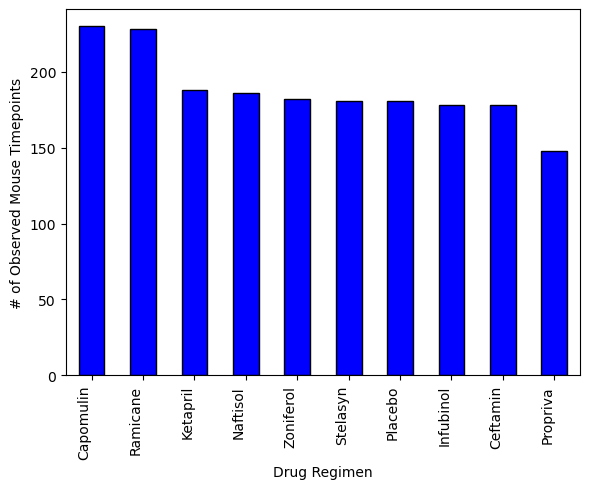

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each Drug Regimen
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
ax = drug_regimen_counts.plot(kind='bar', color='blue', edgecolor='black', figsize=(6, 5))

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


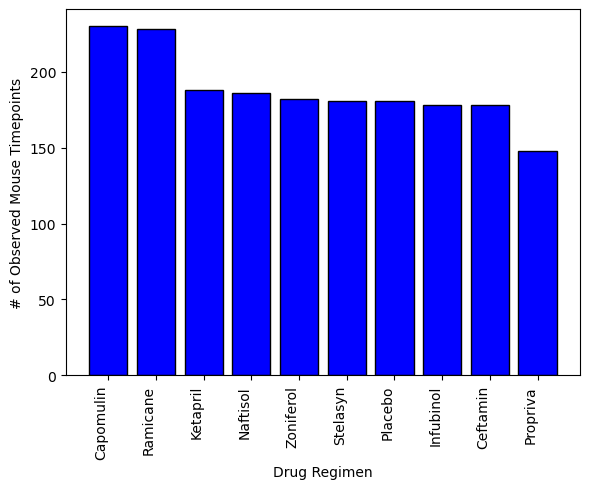

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Prepare data for plotting
drug_regimen = drug_regimen_counts.index
counts = drug_regimen_counts.values

# Create the bar plot using matplotlib
plt.figure(figsize=(6, 5))
plt.bar(drug_regimen, counts, color='blue', edgecolor='black')

# Set the title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

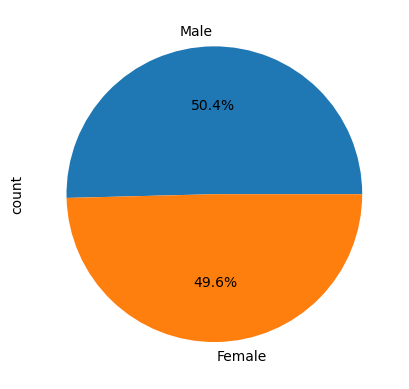

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
# Get the unique mice with their gender
unique_mice = clean_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

# Count the number of unique mice by gender
gender_counts = unique_mice['Sex'].value_counts()

# Generate the pie chart using Pandas
ax = gender_counts.plot.pie(autopct='%1.1f%%')

# Show the plot
plt.show()


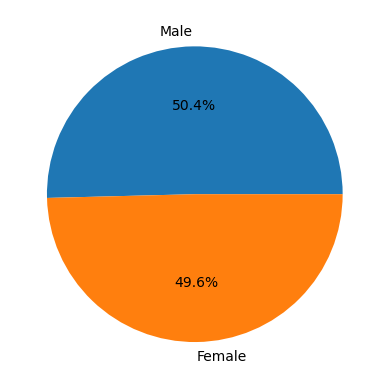

In [19]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
# Get the unique mice with their gender
unique_mice = clean_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

# Count the number of unique mice by gender
gender_counts = unique_mice['Sex'].value_counts()

# Generate the pie chart using Pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint, combined_data, on=['Mouse ID', 'Timepoint'])

# Step 3: Filter the data for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = last_timepoint_data[last_timepoint_data['Drug Regimen'].isin(treatment_regimens)]

# Display the final tumor volume data for the specified treatments
filtered_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
239,y769,Ceftamin,68.594745
240,y793,Capomulin,31.896238
241,y865,Ceftamin,64.729837
245,z578,Ramicane,30.638696


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
   # Determine outliers using upper and lower bounds
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Create an empty list to fill with tumor volume data for plotting
tumor_volumes = []

# Dictionary to store potential outliers
outliers = {}

# Step 3: Calculate the IQR and determine potential outliers for each treatment regimen
for regimen in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = filtered_data[filtered_data['Drug Regimen'] == regimen]
    
    # Add subset to the list for plotting
    tumor_volumes.append(regimen_data['Tumor Volume (mm3)'])
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for IQR
    Q1 = regimen_data['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = regimen_data['Tumor Volume (mm3)'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[regimen] = regimen_data[(regimen_data['Tumor Volume (mm3)'] < lower_bound) |
                                     (regimen_data['Tumor Volume (mm3)'] > upper_bound)]['Tumor Volume (mm3)']

# Display potential outliers
for regimen, outlier_values in outliers.items():
    print(f"{regimen}'s potential outliers: {outlier_values}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Figure size 1000x600 with 0 Axes>

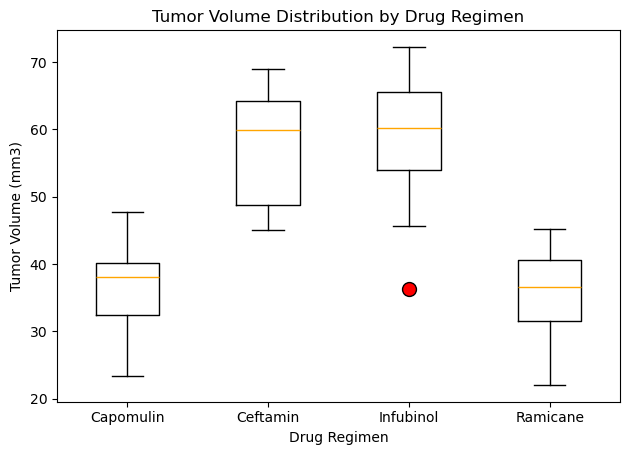

In [24]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
boxprops = dict(linestyle='-', linewidth=1, color='black')
whiskerprops = dict(linestyle='-', linewidth=1, color='black')
medianprops = dict(linestyle='-', linewidth=1, color='orange')
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=10)

# Generate the box plot
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, 
                      boxprops=boxprops, whiskerprops=whiskerprops, 
                      medianprops=medianprops, flierprops=flierprops, patch_artist=False)

plt.title('Tumor Volume Distribution by Drug Regimen')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

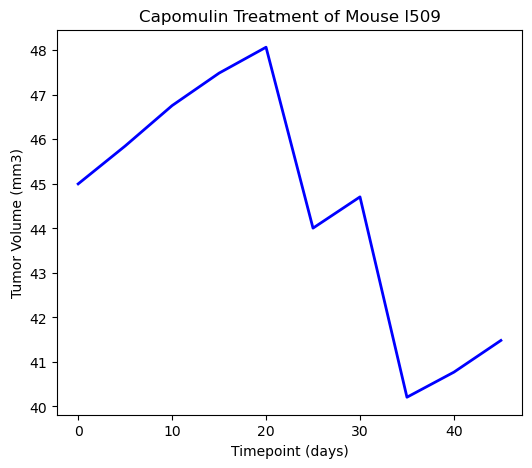

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'  # Replace with the actual mouse ID you want to plot
capomulin_data = combined_data[(combined_data['Drug Regimen'] == 'Capomulin') & (combined_data['Mouse ID'] == mouse_id)]

# Step 2: Plot the data
plt.figure(figsize=(6, 5))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], color='blue', linestyle='-', linewidth=2)

plt.title(f'Capomulin Treatment of Mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

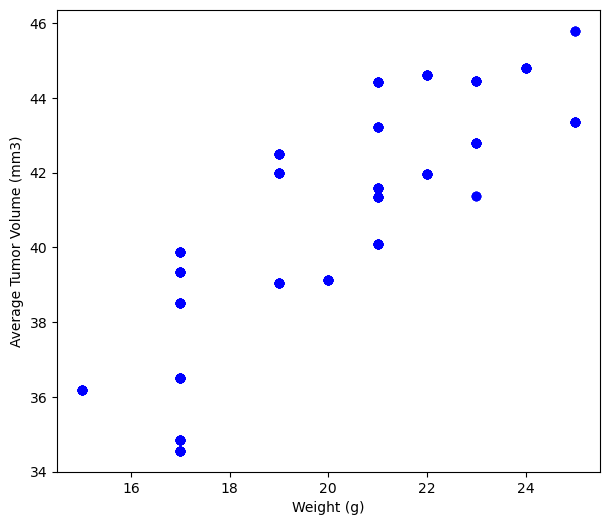

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Step 2: Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
average_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'}, inplace=True)

# Step 3: Merge this data with the original Capomulin data to get mouse weights
merged_data = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']], average_tumor_volume, on='Mouse ID')

# Step 4: Plot the data
plt.figure(figsize=(7,6))
plt.scatter(merged_data['Weight (g)'], merged_data['Average Tumor Volume'], marker='o', color='blue')

# Adding titles and labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


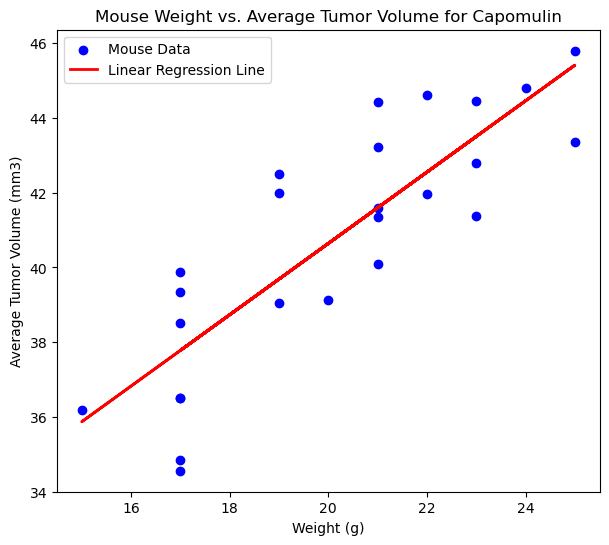

In [33]:
import scipy.stats as stats
apomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
average_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'}, inplace=True)

# Merge with weight data
mouse_weights = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
capomulin_summary = pd.merge(average_tumor_volume, mouse_weights, on='Mouse ID')

# Calculate the correlation coefficient
correlation_coefficient = capomulin_summary['Average Tumor Volume (mm3)'].corr(capomulin_summary['Weight (g)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(capomulin_summary['Weight (g)'], capomulin_summary['Average Tumor Volume (mm3)'])

# Plot the scatter plot with the linear regression line
plt.figure(figsize=(7, 6))
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Average Tumor Volume (mm3)'], color='blue', label='Mouse Data')
plt.plot(capomulin_summary['Weight (g)'], slope * capomulin_summary['Weight (g)'] + intercept, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.legend()
plt.show()